<a href="https://colab.research.google.com/github/RJ-Stony/Machine_Learning_Project/blob/main/(%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8)%20Netflix_Original_Films%EC%9D%98_IMDB_Scores_%EB%B6%84%EC%84%9D%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주제 : Netflix Original Films의 IMDB Scores 분석하기!
----------


## 데이터 소개
    - 이번 주제는 Netflix Original Films & IMDB Scores을 사용합니다.
    
    - 다음 1개의 csv 파일을 사용합니다.
    NetflixOriginals.csv
    
    - 각 파일의 컬럼은 아래와 같습니다.
    Title: 영화의 이름
    Genre: 영화의 장르
    Premiere: 개봉 날짜
    Runtime: 런타임
    Language: 영화의 언어
    IMDB Score: 영화의 IMDB 점수

    
- 데이터 출처: https://www.kaggle.com/luiscorter/netflix-original-films-imdb-scores

## 최종 목표
    - 흥미로운 일상적인 데이터 분석해 보기
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - 학습된 모델로 부터의 인사이트 획득 방법 습득


## Step 1. 데이터셋 준비하기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [ ]:
import os

In [ ]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME'] = 'USER_NAME'
os.environ['KAGGLE_KEY'] = 'USER_KEY'

### 문제 2. 데이터 다운로드 및 압축 해제하기


In [ ]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기
!rm *.*
!kaggle datasets download -d luiscorter/netflix-original-films-imdb-scores
!unzip '*.zip'

rm: cannot remove '*.*': No such file or directory
  0% 0.00/12.4k [00:00<?, ?B/s]
100% 12.4k/12.4k [00:00<00:00, 11.0MB/s]
Archive:  netflix-original-films-imdb-scores.zip
  inflating: NetflixOriginals.csv    


### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [ ]:
df = pd.read_csv('NetflixOriginals.csv', encoding='ISO-8859-1')

In [ ]:
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


### 문제 4. Premiere를 datetime 객체로 변환하기

In [ ]:
df['Premiere'] = df['Premiere'].apply(lambda s: pd.to_datetime(str(s)))

In [ ]:
df.head()

,Title,Genre,Premiere,Runtime,Score,Language
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian
3,The Open House,Horror thriller,2018-01-19,94,3.2,English
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi


In [ ]:
df['Premiere'].min(), df['Premiere'].max()

(Timestamp('2014-12-13 00:00:00'), Timestamp('2021-05-27 00:00:00'))

### 문제 5. Premiere를 Premiere of Year로 바꾸기

In [ ]:
df['Premiere'] = df['Premiere'].dt.year

In [ ]:
df.rename(columns={'Premiere_of_Year':'Year_of_Premiere'}, inplace=True)
df.head()

,Title,Genre,Year_of_Premiere,Runtime,Score,Language
0,Enter the Anime,Documentary,2019,58,2.5,English/Japanese
1,Dark Forces,Thriller,2020,81,2.6,Spanish
2,The App,Science fiction/Drama,2019,79,2.6,Italian
3,The Open House,Horror thriller,2018,94,3.2,English
4,Kaali Khuhi,Mystery,2020,90,3.4,Hindi


In [ ]:
df['Year_of_Premiere'].min(), df['Year_of_Premiere'].max()

(2014, 2021)

## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 6. 결손 데이터 확인하기


In [ ]:
df.isna().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

### 문제 7. 수치형 데이터의 히스토그램 확인하기

In [ ]:
df.columns

Index(['Title', 'Genre', 'Year_of_Premiere', 'Runtime', 'Score', 'Language'], dtype='object')

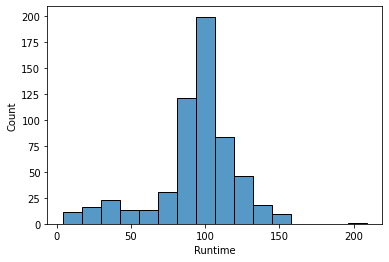

In [ ]:
sns.histplot(x='Runtime', data=df, bins=16)
plt.show()

In [ ]:
df.rename(columns={'IMDB Score':'Score'}, inplace=True)

In [ ]:
df.head()

,Title,Genre,Premiere,Runtime,Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


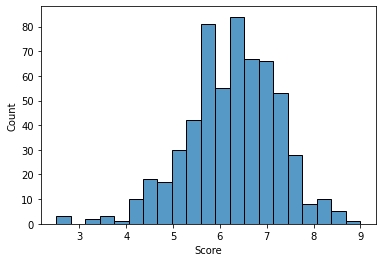

In [ ]:
sns.histplot(x='Score', data=df)
plt.show()

In [ ]:
df[df['Score'] > 8.0]

,Title,Genre,Premiere,Runtime,Score,Language
568,Chasing Coral,Documentary,"July 14, 2017",89,8.1,English
569,My Octopus Teacher,Documentary,"September 7, 2020",85,8.1,English
570,Rising Phoenix,Documentary,"August 26, 2020",106,8.1,English
571,13th,Documentary,"October 7, 2016",100,8.2,English
572,Disclosure: Trans Lives on Screen,Documentary,"June 19, 2020",107,8.2,English
573,Klaus,Animation/Christmas/Comedy/Adventure,"November 15, 2019",97,8.2,English
574,Seaspiracy,Documentary,"March 24, 2021",89,8.2,English
575,The Three Deaths of Marisela Escobedo,Documentary,"October 14, 2020",109,8.2,Spanish
576,Cuba and the Cameraman,Documentary,"November 24, 2017",114,8.3,English
577,Dancing with the Birds,Documentary,"October 23, 2019",51,8.3,English


### 문제 8. Runtime과 IMDB Score의 Jointplot 분석하기

In [ ]:
df.dtypes

Title                object
Genre                object
Year_of_Premiere      int64
Runtime               int64
Score               float64
Language             object
dtype: object

In [ ]:
df.columns

Index(['Title', 'Genre', 'Year_of_Premiere', 'Runtime', 'Score', 'Language'], dtype='object')

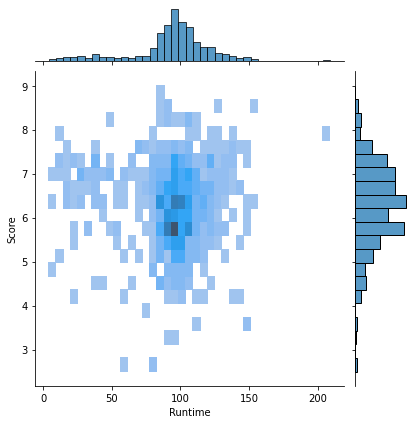

In [ ]:
sns.jointplot(x='Runtime', y='Score', data=df, kind='hist')
plt.show()

### 문제 9. 범주형 데이터의 Score를 Boxplot으로 분석하기

In [ ]:
df.columns

Index(['Title', 'Genre', 'Year_of_Premiere', 'Runtime', 'Score', 'Language'], dtype='object')

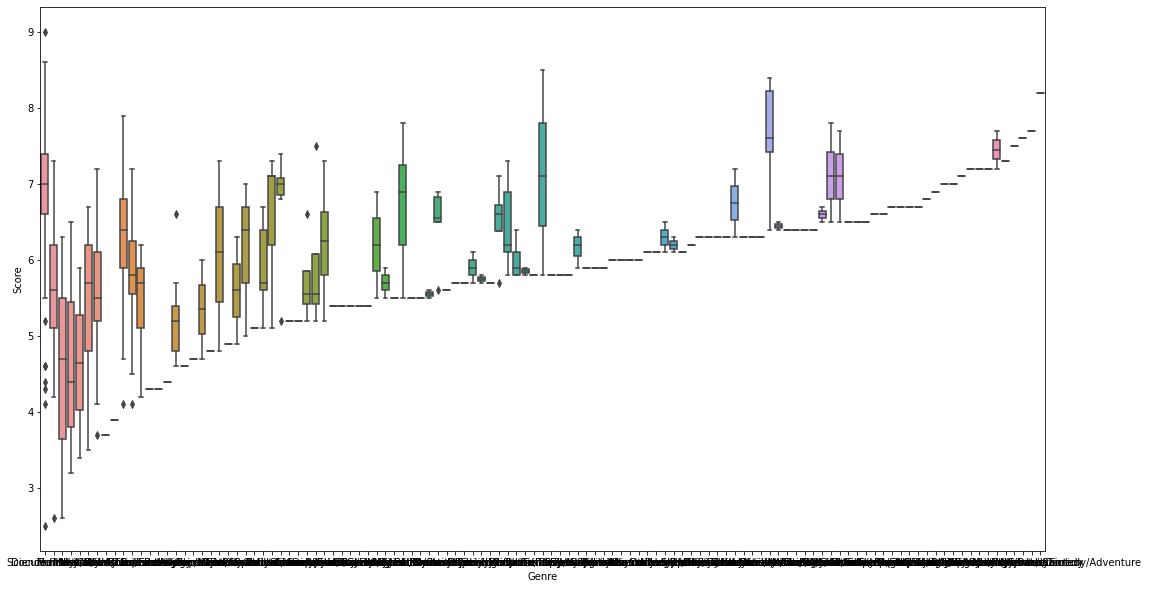

In [ ]:
fig = plt.figure(figsize=(18, 10))
sns.boxplot(x='Genre', y='Score', data=df)
plt.show()

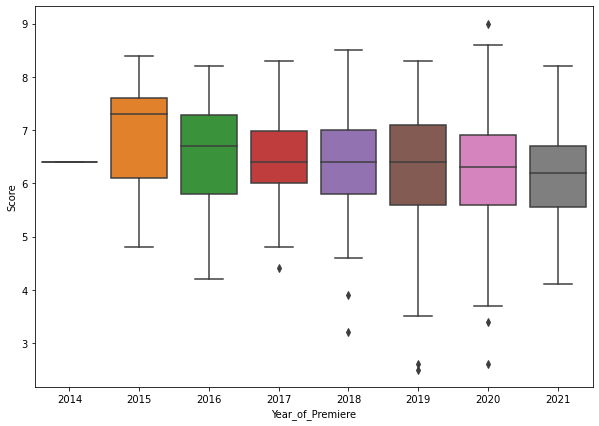

In [ ]:
fig = plt.figure(figsize=(10, 7))
sns.boxplot(x='Year_of_Premiere', y='Score', data=df)
plt.show()

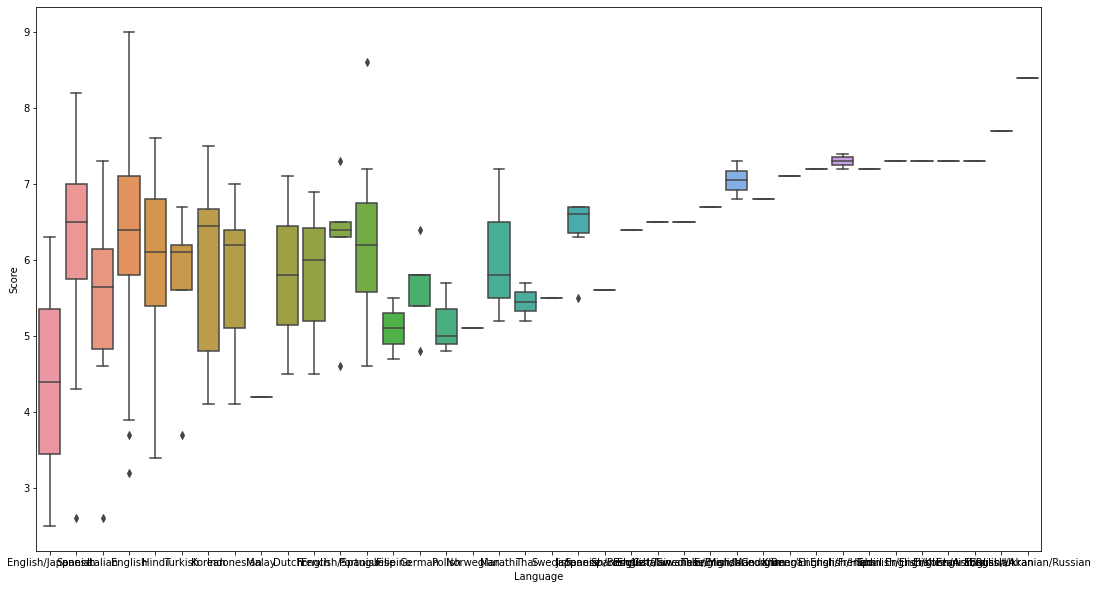

In [ ]:
fig = plt.figure(figsize=(18, 10))
sns.boxplot(x='Language', y='Score', data=df)
plt.show()

### 문제 10. 수치형 데이터간의 상관성 시각화하기

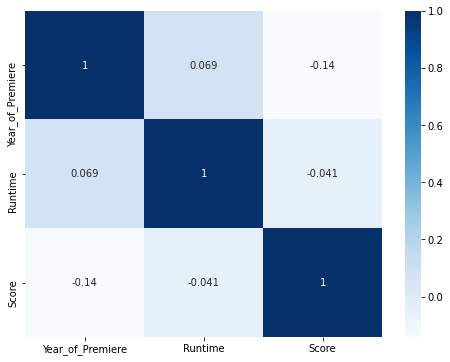

In [ ]:
# Correlation Heatmap 시각화하기
fig = plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()

## Step 3. 모델 학습을 위한 데이터 전처리 

### 문제 11. 범주형 데이터에서 소수 범주를 others로 대체하기

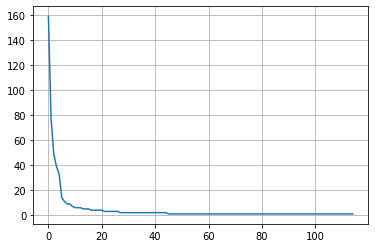

In [ ]:
# 범주형 데이터 중 범주가 너무 적은 경우 others 범주로 대체하기
genre = df['Genre'].value_counts()
plt.plot(range(len(genre)), genre)
plt.grid()
plt.show()

In [ ]:
df['Genre'] = df['Genre'].apply(lambda s: s if s not in genre[10:] else 'others')

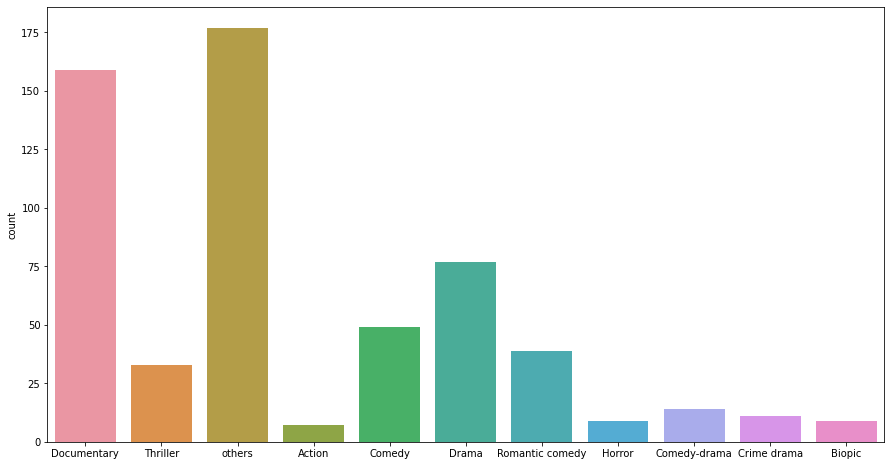

In [ ]:
fig = plt.figure(figsize=(15, 8))
sns.countplot(x='Genre', data=df)
plt.xlabel('')
plt.show()

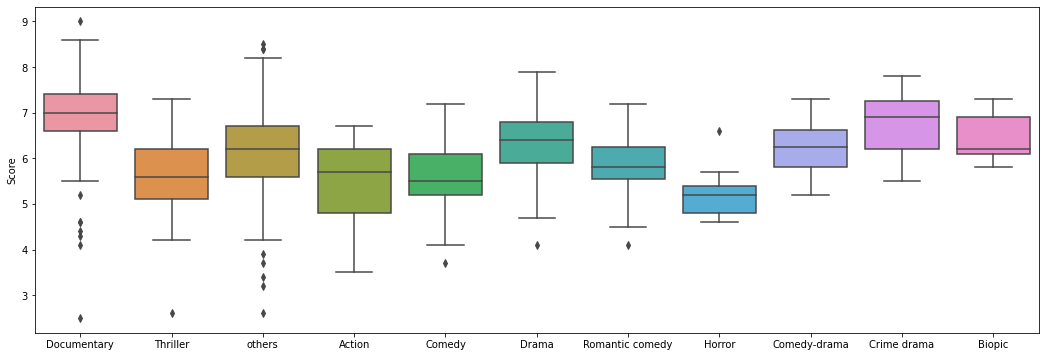

In [ ]:
fig = plt.figure(figsize=(18, 6))
sns.boxplot(x='Genre', y='Score', data=df)
plt.xlabel('')
plt.show()

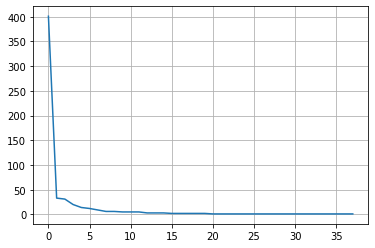

In [ ]:
lang = df['Language'].value_counts()
plt.plot(range(len(lang)), lang)
plt.grid()
plt.show()

In [ ]:
df['Language'] = df['Language'].apply(lambda s: s if s not in lang[1:] else 'others')

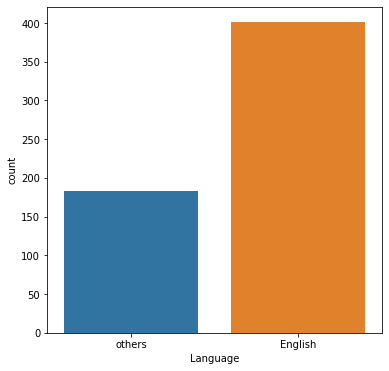

In [ ]:
fig = plt.figure(figsize=(6, 6))
sns.countplot(x='Language', data=df)
plt.show()

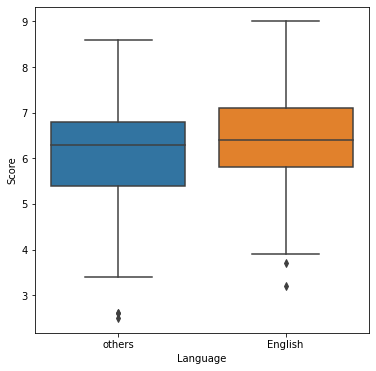

In [ ]:
fig = plt.figure(figsize=(6, 6))
sns.boxplot(x='Language', y='Score', data=df)
plt.show()

In [ ]:
year = df['Year_of_Premiere'].value_counts()
df['Year_of_Premiere'] = df['Year_of_Premiere'].apply(lambda s: s if s not in year[7:] else 2015)

In [ ]:
df['Year_of_Premiere'].value_counts()

2020    183
2019    125
2018     99
2021     71
2017     66
2016     30
2015     10
Name: Year_of_Premiere, dtype: int64

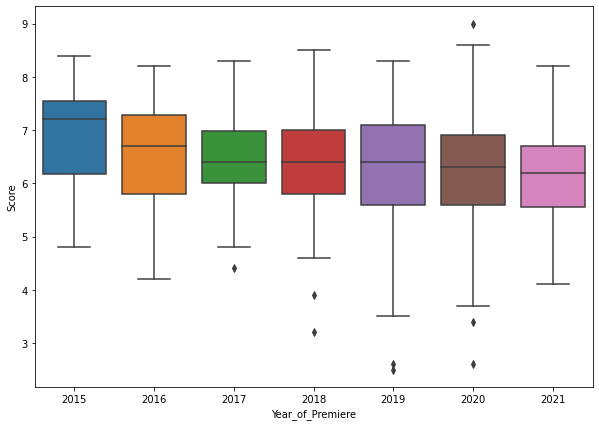

In [ ]:
fig = plt.figure(figsize=(10, 7))
sns.boxplot(x='Year_of_Premiere', y='Score', data=df)
plt.show()

### 문제 12. get_dummies를 이용한 범주형 데이터 전처리

In [ ]:
df.columns

Index(['Title', 'Genre', 'Year_of_Premiere', 'Runtime', 'Score', 'Language'], dtype='object')

In [ ]:
df['Year_of_Premiere'] = df['Year_of_Premiere'].astype(str)

In [ ]:
X_cat = df[['Genre', 'Year_of_Premiere', 'Language']]
X_cat = pd.get_dummies(X_cat)

In [ ]:
X_cat.head()

,Genre_Action,Genre_Biopic,Genre_Comedy,Genre_Comedy-drama,Genre_Crime drama,Genre_Documentary,Genre_Drama,Genre_Horror,Genre_Romantic comedy,Genre_Thriller,Genre_others,Year_of_Premiere_2015,Year_of_Premiere_2016,Year_of_Premiere_2017,Year_of_Premiere_2018,Year_of_Premiere_2019,Year_of_Premiere_2020,Year_of_Premiere_2021,Language_English,Language_others
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1


## Step 4. IMDB Score Regression 모델 학습하기

### 문제 13. Score 추정을 위한 입출력 데이터 구성하기

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
df.columns

Index(['Title', 'Genre', 'Year_of_Premiere', 'Runtime', 'Score', 'Language'], dtype='object')

In [ ]:
# Score 추정을 위해 적절한 입력과 출력 컬럼 선정
# 수치형 데이터는 StandardScaler를 이용해 표준화

X_num = df[['Runtime']]

scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)

X = pd.concat([X_scaled, X_cat], axis=1)
y = df['Score']

In [ ]:
X.head()

,Runtime,Genre_Action,Genre_Biopic,Genre_Comedy,Genre_Comedy-drama,Genre_Crime drama,Genre_Documentary,Genre_Drama,Genre_Horror,Genre_Romantic comedy,Genre_Thriller,Genre_others,Year_of_Premiere_2015,Year_of_Premiere_2016,Year_of_Premiere_2017,Year_of_Premiere_2018,Year_of_Premiere_2019,Year_of_Premiere_2020,Year_of_Premiere_2021,Language_English,Language_others
0,-1.282615,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,-0.453425,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
2,-0.525528,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3,0.015248,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,-0.128959,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1


In [ ]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2021)

### 문제 14. XGBoost 모델 생성/학습하기

In [ ]:
from xgboost import XGBRegressor

In [ ]:
# XGBRegressor 모델 생성/학습
model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)

[11:08:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

### 문제 15. Linear Regression 모델 생성/학습하기

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# LinearRegression 모델 생성/학습
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 문제 16. 모델 학습 결과 평가하기

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [ ]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred_xgb = model_xgb.predict(X_test)
pred_lr = model_lr.predict(X_test)

print('XGB MAE:', mean_absolute_error(y_test, pred_xgb))
print('XGB RMSE:', sqrt(mean_squared_error(y_test, pred_xgb)))
print('LR MAE:', mean_absolute_error(y_test, pred_lr))
print('LR RMSE:', sqrt(mean_squared_error(y_test, pred_lr)))

XGB MAE: 0.6651549485596744
XGB RMSE: 0.9256830297003074
LR MAE: 0.6398247102632183
LR RMSE: 0.9185972936606078


### 문제 17. 실제 값과 추측 값의 Scatter plot 시각화하기

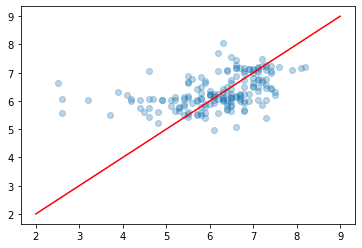

In [ ]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기
plt.scatter(y_test, pred_xgb, alpha=.3)
plt.plot([2, 9], [2, 9], 'r-')
plt.show()

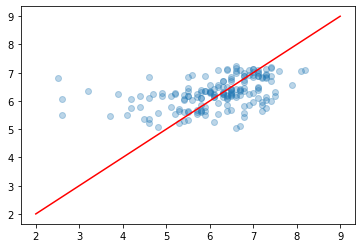

In [ ]:
plt.scatter(y_test, pred_lr, alpha=.3)
plt.plot([2, 9], [2, 9], 'r-')
plt.show()

### 문제 18. XGBoost 모델의 Feature Importance 시각화하기

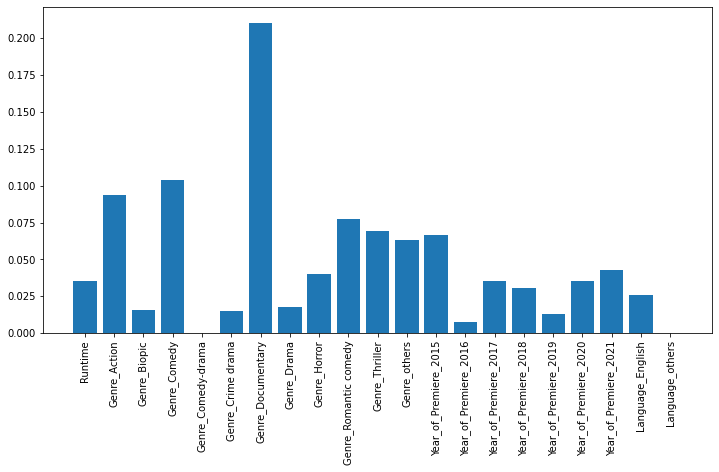

In [ ]:
fig = plt.figure(figsize=(12, 6))
plt.bar(X.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()